## Assignment A1b: Functions and Computation

Please follow the General Assignment Guidelines document on canvas under the Pages for completing this assignment.  When you have completed the assignment, please follow the Submission Instructions.

### Overview

In this assignment you write more complex functions, learn to use vector operations, and make more complex plots.  You will learn  basic functions, computations, and programming style that will be useful in later parts of the course.

### Learning objectives
- convert between values in time, samples, and radians
- plot functions with time axes
- plot common functions and vary their key parameters
- simplify code by using default values
- overlay and style plots to show relative position
- use plot styles for discrete and continuous functions
- make matrix of plots to illustrate a functions parameter space
- write code in a functional programming style
- write code in terms of vector operations
- normalize a function over its range
- write simple functions to compute local maxima and threshold crossings

***
## Exercises

### 1. Common functions

Write code to implement and plot the functions described below.  Use the same names as the titles below and use the following guidelines

- write functions that are easily reusable
- use vector or broadcasting operations when possible
- do not worry about the efficiency of the implementation
- use keyword arguments with default values for parameters
- use a coding style that emphasizes clarity of the ideas
- group lines of code by ideas
- comment only what might not be clear to another student reading your code
- choose meaningful or mnemonic variable names that won't be cryptic to another reader

Plots and figures:
- plots should have descriptive titles and axis labels.
- font sizes and plot details should be legible
- labels and legends shouldn't hide plot content

### 1a. `sinewave`

The most basic function in signal processing and in modeling many perceptual phenomena is the sinusoid

$$
\sin(2\pi f t + \phi)
$$

where $f$ is the frequency in Hertz, t is time in seconds, and $\phi$ is the phase in radians.  

When working with sounds, however, it is often more convenient to think of a sine wave as having a time delay that is specified in seconds.  Write a function `sinewave(t; f=1.0, d=0.0)` that has arguments of `t` for the time value, `f` for the frequency, and `d` for the delay in seconds, with default values for the frequency and delay. Note that delay refers to a delay in the signal, i.e. a signal that normally starts at a time of 0 seconds with a delay `d = 0.01` would now start to +10 millseconds.

Arrays of time values for a given sampling frequency should be defined *outside* the function.  A vector version of the function (if you are not using broadcasting) should accept an array of time values and return an array of function values at those times.  These conventions also apply to the functions below.

Show with unit analysis the formulas to convert 1) a time in seconds to a sample index, using $f_s$ as the sampling frequency and $i$ as the sample index (zero-based), and 2) the delay in seconds to phase in radians.

Note when we sample function $f(t)$ there are three different time-related variables to keep distinct: 1) continuous time of the function; 2) the times of the discrete set of samples.  These are real-valued, and describe the time points at the centers of the sample periods. And 3) the index of the array.

In [94]:
import numpy as np
import math

def sinewave(t, f: float=1.0, d: float=0.0):
    """
    function to create a sinewave

    params:
    t: float - the time value
    f: float - the frequency of the wave
    d: float - the delay in time

    return:
    float - the function value for the specified time
    """

    # check that t is of type np.array
    t = np.array(t) if type(t) is list else t

    # math and return
    return np.sin((2 * np.pi * f * t) + (2 * np.pi * d * f))

In [95]:
# plot function implementation
from matplotlib import pyplot as plt

def plot_sinewave(t, f:float=1.0, d:float=0.0):
    """
    function to create a sinewave

    params:
    t: float - the time value
    f: float - the frequency of the wave
    d: float - the delay in time
    """

    # calculate sin wave
    S = sinewave(t, f, d)

    # plot
    plt.plot(t, S)
    plt.title("Sine Wave")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

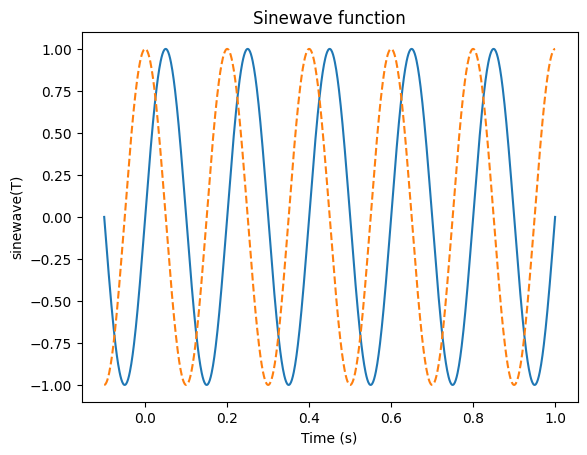

In [96]:
# define x values
T = np.linspace(-0.1, 1, 1000)

# get sine values
S = sinewave(T, 5, 0)
D = sinewave(T, 5, 0.05)

# plot
plt.plot(T, S)
plt.plot(T, D, "--")
plt.xlabel("Time (s)")
plt.ylabel("sinewave(T)")
plt.title("Sinewave function")
plt.show()

### 1b. `gabor`

A **Gabor function** is a sinusoid modulated by a Gaussian.  It is used to describe a filter that is localized in both time and frequency or, for a spatial signal like an image, position and spatial frequency.  We will see later that 2D Gabor functions arise is the context of efficient visual representations.  Remarkably, the filtering and representation properties of the early visual system are described quite accurately with Gabor functions.  Gabor-like features commonly emerge in the first layers of neural networks when trained on general visual tasks.

Mathematically, Gabor functions are usually centered at zero and are defined with a cos or sin function to give even and odd versions of the functions, respectively.  More generally, it can be defined as

$$
g(t) = a \exp\left(\frac{-t^2}{2\sigma^2}\right) \cos(2\pi ft + \phi)
$$

There are several parameters, but they are usually have values set to give characteristic properties. The amplitude $a$ is a normalizing constant you should define so $g(t)$ has unit norm

$$
|| g(t) || = \left(\sum_t g(t)^2\right)^{1/2} = 1
$$

$\sigma$ is the Gaussian width (or standard deviation) which is usually a small (integer) number of sinusoid periods.  The frequency $f$ is in Hertz for temporal signals.  For spatial signals, it is often convenient to define the sinusoid in terms of the period in pixels or samples, e.g. 1 period per 8 pixels.  The phase is in radians and is usually restricted to 0 or $\pi/2$ to give **even** and **odd** versions of the Gabor function (`gabore` and `gaboro`, which you should also define).

Scalar function definitions (for a scalar value of `t`) do not need to be normalized (since it depends on the sampling frequency), but they should accept the normalizing constant `a`.  

Note that the scalar function *could* be computed (given the sampling frequency), but this would be very inefficient.  Instead, define functions `gabor_norm`, `gabore_norm`, and `gaboro_norm` to compute the normalization constant.  These should accept the same arguments as the scalar functions, but without a time argument and have an additional argument for the sampling frequency.  The normalization constants should be computed using the non-zero extents of the functions.

Vector functions should be normalized over the extent of the argument vector `t`.

In [97]:
# my implementation of the gabor functions
import numpy as np

def gabor(t, a:float=1.0, sigma:float=1, f:float=1.0, phi:float=0.0):
    """
    method to define the gabor function
    
    params:
    t: float or np.array or list - the input x values
    a: float - the amplitude of the wave
    sigma: float - the gaussian width (standard distrubution)
    f: float - frequency
    phi: float - the phase to give gabore or gaboro functions
    """

    # math and return
    return a * np.exp((-t**2)/(2.0 * (sigma**2))) * np.cos(2*np.pi*f*t+phi)

def gabore(t, a:float=1.0, sigma:float=1, f:float=1.0):
    """
    a helper function to perform the even gabor function

    params:
    t: float or np.array or list - the input x values
    a: float - the amplitude of the wave
    sigma: float - the gaussian width (standard distrubution)
    f: float - frequency
    phi: float - the phase to give gabore or gaboro functions

    return:
    the even function of a gabor
    """

    # call gabor with correct phase and return
    return gabor(t, a, sigma, f, phi=0.0)

def gaboro(t, a:float=1.0, sigma:float=1, f:float=1.0):
    """
    a helper function to perform the odd gabor function

    params:
    t: float or np.array or list - the input x values
    a: float - the amplitude of the wave
    sigma: float - the gaussian width (standard distrubution)
    f: float - frequency
    phi: float - the phase to give gaboro functions

    return:
    the even function of a gabor
    """

    # call gabor with correct phase and return
    return gabor(t, a, sigma, f, phi=(np.pi/2))

def gabor_norm(fs, sigma=1, f=1.0, phi=0.0):
    """
    function to define the normalized gabor
    
    params:
    fs: float - the space between x-values
    sigma: float - the gaussian width
    f: float - the frequency
    phi: the gabor phase (0 or np.pi/2)
    
    return:
    np.array - the normalized gabor values
    """

    # define time values
    T = np.arange(-math.sqrt(-math.log(0.01)*2*(sigma)**2), math.sqrt(-math.log(0.01)*2*(sigma)**2), fs)

    # gabor and return
    G = gabor(T, a=1.0, sigma=sigma, f=f, phi=phi)
    return np.linalg.norm(G, ord=2)

def gabore_norm(fs, sigma=1, f=1.0):
    """
    function to define the normalized gabor
    
    params:
    fs: float - the space between x-values
    sigma: float - the gaussian width
    f: float - the frequency
    
    return:
    np.array - the normalized gabor values
    """

    # define time values
    T = np.arange(-math.sqrt(-math.log(0.01)*2*(sigma)**2), math.sqrt(-math.log(0.01)*2*(sigma)**2), fs)

    # gabor and return
    G = gabore(T, a=1, sigma=sigma, f=f)
    return np.linalg.norm(G, ord=2)

def gaboro_norm(fs, sigma=1, f=1.0):
    """
    function to define the normalized gabor
    
    params:
    fs: float - the space between x-values
    sigma: float - the gaussian width
    f: float - the frequency
    phi: the gabor phase (0 or np.pi/2)
    
    return:
    np.array - the normalized gabor values
    """

    # define time values
    T = np.arange(-math.sqrt(-math.log(0.01)*2*(sigma)**2), math.sqrt(-math.log(0.01)*2*(sigma)**2), fs)

    # gabor and return
    G = gaboro(T, a=1.0, sigma=sigma, f=f)
    return np.linalg.norm(G, ord=2)

In [98]:
# code to plot the gabor functions outlined above
from matplotlib import pyplot as plt

def plot_gabor(t, sigma=4.0, f=1.0, a=1.0, phi:str='e'):
    """
    function to plot a gabor of the user's choosing
    
    params:
    t: np.array - the times to calculate for
    sigma: float - the gaussian width
    f: float - the frequency
    a: float - the amplitude
    phi: str - the phase (e or o)
    """

    # calculate gabor values
    G = gabor(t, a, sigma, f, phi=0 if phi == 'e' else np.pi/2)

    # plot
    plt.plot(t, G)
    plt.title(f"Gabor function with parameters sigma={sigma}, f={f}, a={a}, phase={phi}")
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")
    plt.show()

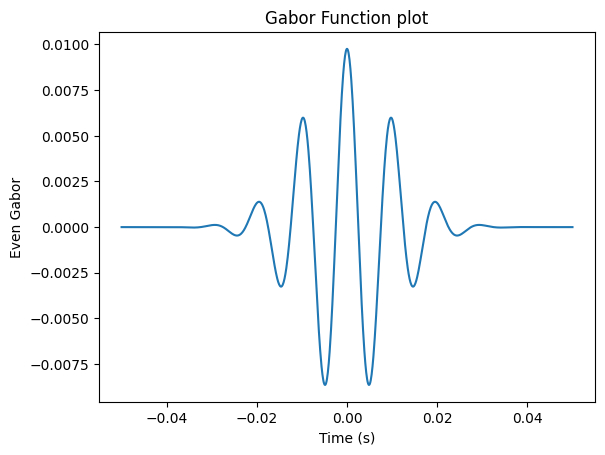

In [99]:
# Plot a normalized even Gabor function using a frequency of f=100 Hz with σ = 1/f
T = np.linspace(-0.05, 0.05, 1000)

# generate gabor values
a = gabore_norm(fs=10000, sigma=1/100, f=100)
G = gabore(t=T, a=a, sigma=1/100, f=100)

# plot
plt.plot(T, G)
plt.xlabel("Time (s)")
plt.ylabel("Even Gabor")
plt.title("Gabor Function plot")
plt.show()

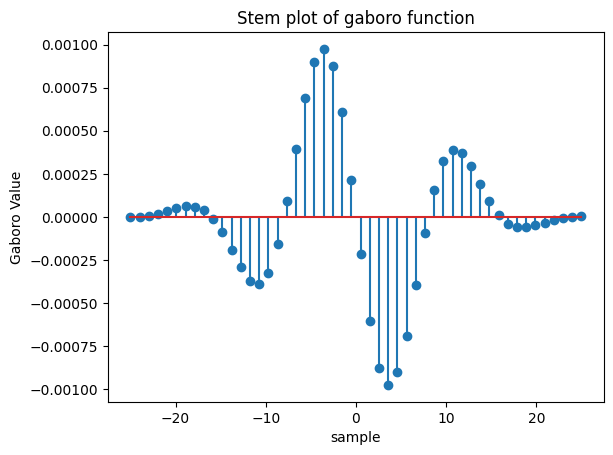

In [100]:
# Plot an odd Gabor function that shows the discrete samples using a stem plot (i.e. where each sample is shown as a line extending from x=0 
# to the sample value which is usually a round marker).  Use the parameters of 16 samples per period with σ = 8 samples. 
T = np.linspace(-25, 25, 50)

# generate gaboro values
G = gaboro(T, a=gaboro_norm(1000, 8, 1/16), sigma=8, f=1/16)

# plot
plt.stem(T, G)
plt.xlabel("sample")
plt.ylabel("Gaboro Value")
plt.title("Stem plot of gaboro function")
plt.show()

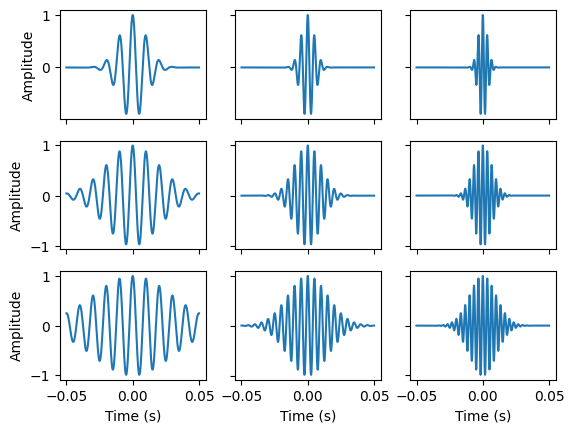

In [101]:
# Make a 3x3 grid of Gabor function plots with frequencies f=100, 200, and 300 in the columns and widths σ = n/f for n=1, 2, and 3.
# Each plot should show these two parameter values.

# initialize settings that are needed
T = np.linspace(-0.05, 0.05, 1000)
F = [100, 200, 300]
N = [1, 2, 3]

# generate subplots
fig, ax = plt.subplots(3, 3)

# loop to generate values and plot
for i in range(len(F)):
    for j in range(len(N)):
        G = gabor(t=T, a=1, sigma=N[j]/F[i], f=F[i], phi=0)
        ax[j,i].plot(T, G)

# set axes
for a in ax.flat:
    a.set(xlabel="Time (s)", ylabel="Amplitude")
for a in ax.flat:
    a.label_outer()

### 1c. `gammatone`

The **gammatone function** is used to model cochlear filtering and is defined as

$$
g(t) = at^{n-1} e^{-2\pi b t} \cos(2\pi f t + \phi), \quad t \ge 0
$$

where $f$ is the frequency in Hertz and $\phi$ is the phase in radians.  Note that $g(t) = 0$ for $ t < 0$. The exponent $n$ is the shape parameter ($n=4$ is a typical value).  The inverse scale parameter $b$ is defined as

$
b = 1.019 \cdot \textrm{ERB(f)}
$

where

$
\textrm{ERB}(f) = 24.7(4.37 f / 1000 + 1)
$

The amplitude $a$ should be set so that the function has unit norm.  ERB stands for equivalent rectangular bandwidth.  These specific values are used to model the filtering properties of the cochlea at different frequencies. We will cover this in more detail in future lectures.

In [102]:
# my implementation of the gammatone function
import numpy as np

def gammatone(t, a:float=1.0, f:float=1.0, n:float=4.0, phi:float=0.0, norm:bool=False):
    """
    function to implement the gammatone
    
    params:
    t: list or np.array or float - the input time value
    f: float - frequency
    n: float - shape parameter
    phi: float - phase
    """

    # check that t is the right form
    t = np.array(t) if type(t) is list else t

    # calculate other params, math
    b = 1.019*(24.7*(((4.37*f)/1000) + 1))
    G = a * (t**(n-1))*np.exp(-2*np.pi*b*t)*np.cos(2*np.pi*f*t + phi)

    # normalize if necessary and return
    G = ( G / np.sum(np.absolute(G)) ) if norm is True else G
    return G

In [103]:
# implementation to plot the gammatone
from matplotlib import pyplot as plt

def plot_gammatone(t, a:float=1.0, f:float=1.0, n:float=4.0, phi:float=0.0, norm:bool=False):
    """
    function to implement the gammatone
    
    params:
    t: list or np.array or float - the input time value
    f: float - frequency
    n: float - shape parameter
    phi: float - phase
    """

    # check that t is the right form
    t = np.array(t) if type(t) is list else t

    # calculate other params, math
    b = 1.1019 * (24.7*(4.37*f/1000 + 1))
    G = gammatone(t, a, f, n, phi, norm)

    # plot
    plt.plot(t, G)
    plt.title("Gammatone Function")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    plt.xlim(0, 0.05)
    plt.show()
    

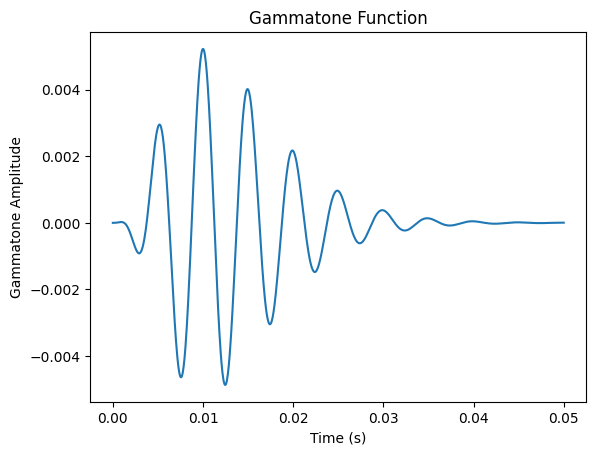

In [104]:
# Plot a normalized gammatone function with frequency f=200, n=4, and zero phase.
T = np.linspace(0, 0.05, 1000)

# get gammatone values
a = gaboro_norm(0.01, 100, 10000)
G = gammatone(t=T, a=a, f=200, n=4, phi=0, norm=True)

# plot
plt.plot(T, G)
plt.xlabel("Time (s)")
plt.ylabel("Gammatone Amplitude")
plt.title("Gammatone Function")
plt.show()

### 2. Simple computation

### 2a. `localmaxima`

Write a function to compute the indices of the local maxima of a 1D signal (i.e. an array) ignoring edges and plateaus (i.e. ranges where the function has constant value).  The function should return the indices of all maxima, which we will define simply as $f[i-1] < f[i] > f[i+1]$.  Note we have used square brackets to emphasize that $f[i]$ is an array with discrete index $i$ vs $f(t)$ which is a continuous function of $t$.

In [105]:
# my implementation of the local maxima function
import numpy as np

def localmaxima(X: np.array):
    """
    a function that finds local maxima of an input array
    
    params:
    X: np.array - the input array to find the local maxima of
    
    return:
    np.array containing the indeces of local maxima
    """

    # storage
    X = np.array(X) if type(X) is list else X
    return np.array([i for i in range(1, X.shape[0]-1) if X[i] > X[i-1] and X[i] > X[i+1]])

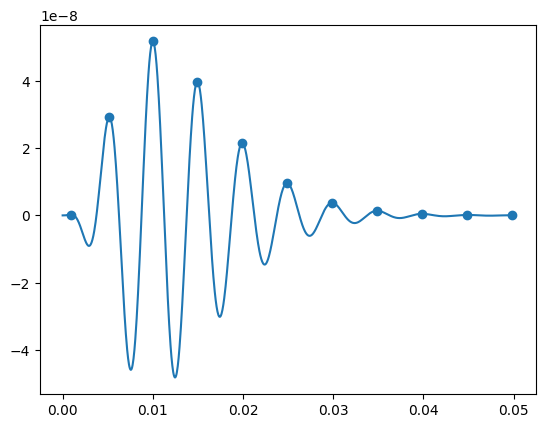

In [106]:
# Use the localmaxima function to make a plot of a 200 Hz gammatone from 0 to 0.05 sec with markers overlaid at each of the sine wave peaks.
T = np.linspace(0, 0.05, 1000)
G = gammatone(T, a=1.0, f=200)

# find maxima
maxima = localmaxima(G)

# filter gabor by maxima indeces
T_max = T[maxima]
G_max = G[maxima]

# plot
plt.plot(T, G)
plt.scatter(T_max, G_max)
plt.show()

In [107]:
# Assume 0-based indexing.  Enter the second element in the array returned by localmaxima([1 3 2 -2 2 4 8 6])
localmaxima([1, 3, 2, -2, 2, 4, 8, 6])

array([1, 6])

### 2b. `crossings`

Write a function to compute the indices of the locations where a function (again an array) first equals or crosses a specified threshold.  The function should also take an argument that specifies three possibilities of the direction of the crossing: 1) **negpos**: from below the threshold to equal to or greater than the threshold; 2) **posneg**: from equal to or greater than threshold to below the threshold; 3) **both**: for crossing in either direction.  It should return the indices of the threshold crossings.

In [108]:
# my implementation of the crossings function
import numpy as np

def crossings(X: np.array, threshold: float=0, direction: str="negpos"):
    """
    a function to detect crossing a threshold
    
    params:
    X: np.array - the input array to check for threshold crossing
    threshold: float - the threshold value to detect
    direction: str - the type of crossing 'negpos', 'posneg', or 'both'
    
    return:
    np.array containing indices of threshold crossing
    """

    # check constraint on direction
    if direction not in ["negpos", "posneg", "both"]:
        raise ValueError
    X = np.array(X) if type(X) is list else X

    # for each direction add to cache
    if direction == "negpos":
        cache = [i for i in range(1, X.shape[0]) if X[i-1] < threshold and X[i] >= threshold]
    elif direction == "posneg":
        cache = [i for i in range(1, X.shape[0]) if X[i-1] >= threshold and X[i] < threshold]
    elif direction == "both":
        cache = [i for i in range(1, X.shape[0]) if (X[i-1] >= threshold and X[i] < threshold) or (X[i-1] < threshold and X[i] >= threshold)]

    # return
    return np.array(cache)

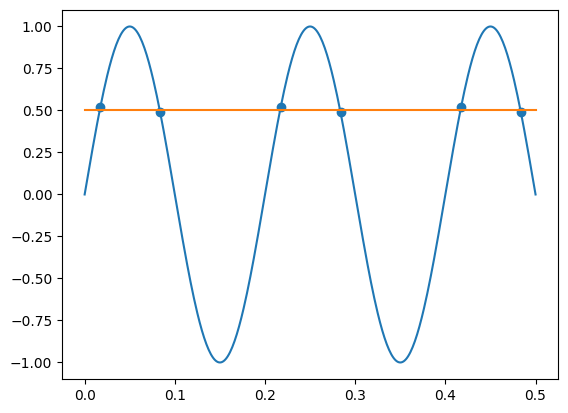

In [109]:
# Plot a 5 Hz sine wave using a sampling frequency of 200 Hz from 0 to 0.5 secs.  
# Overlay a horizontal line at y=0.5 that represents a threshold.  
# Use the crossings function to plot markers at each point where the waveform samples cross above and below the threshold.
T = np.linspace(0, 0.5, num=200*2+1)
S = sinewave(T, f=5, d=1.0)
B = [0.5 for i in range(len(T))]

cross = crossings(S, 0.5, "both")

T_thresh = T[cross]
S_thresh = S[cross]

plt.plot(T, S)
plt.plot(T, B)
plt.scatter(T_thresh, S_thresh)

In [110]:
# Assume 0-based indexing.  Enter the second element in the array returned by crossings([-1 0 1 2 0 -2]; threshold=1, dir=:both)
crossings([-1,0,1,2,0,-2], threshold=1, direction="both")

array([2, 4])

### 2c. `envelope`

If a plotting function isn't designed to handle large numbers of samples, it render very slowly and even hang your system due to the large memory footprint of the plot object.  There are many ways of reducing or downsampling the data to the resolution of the plot.  Here, we will just compute a simple envelope.  Write a function

```ylower, yupper, blockindices = envelope(y; nblocks)```

which, given a waveform or vector `y`, returns the lower and upper bounds for `nblocks`
blocks in `y`.  `blockindices` returns the starting indices of each block.
A reasonable default for `nblocks` is 1/10th the length of `y`.

In [111]:
# my implementation of the envelope function
import numpy as np

def envelope(Y: np.array, nblocks: int=10):
    """
    a function that reduces an input array into nblocks number of blocks
    
    params:
    Y: np.array - the input array
    nblocks: int - the number of blocks to generate
    
    return:
    float - the lower bounds for each block
    float - the upper bounds for each block
    int - the starting index of each block
    """

    Y = np.array(Y) if type(Y) is list else Y

    # generate blockindices
    n_block = int(np.ceil(Y.shape[0]/nblocks))
    blockindices = [n*n_block for n in range(nblocks)] + [len(Y)]

    # generate ylower and yupper
    ylower = [min(Y[n:m]) for n,m in zip(blockindices, blockindices[1:])]
    yupper = [max(Y[n:m]) for n,m in zip(blockindices, blockindices[1:])]

    # return
    return np.array(ylower), np.array(yupper), np.array(blockindices[0:-1])

In [112]:
# use gabor function to test the envelope function
T = np.linspace(0, 10, 1000)
G = gabore(T, a=1.0, sigma=4, f=1)

# find envelope
ylower, yupper, blockindices = envelope(G, nblocks=10)
print(ylower)
print(yupper)
print(blockindices)

[-0.99219751 -0.93192975 -0.82262554 -0.68234055 -0.53160027 -0.38900414
 -0.26755307 -0.17289933 -0.10494497 -0.05982943]
[1.         0.9691534  0.88220617 0.7542802  0.60573178 0.45689147
 0.32369111 0.21539396 0.13462362 0.07903037]
[  0 100 200 300 400 500 600 700 800 900]


In [113]:
# What is the index of the second envelope block for the following array and return values, assuming 0-based indexing?
y = [5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7]
ylower, yupper, blockindices = envelope(y, nblocks=3)
blockindices

array([0, 4, 8])

### Reading audio files
The last part of the quiz asks us to read in an audio file and plot parts of it. Done below.

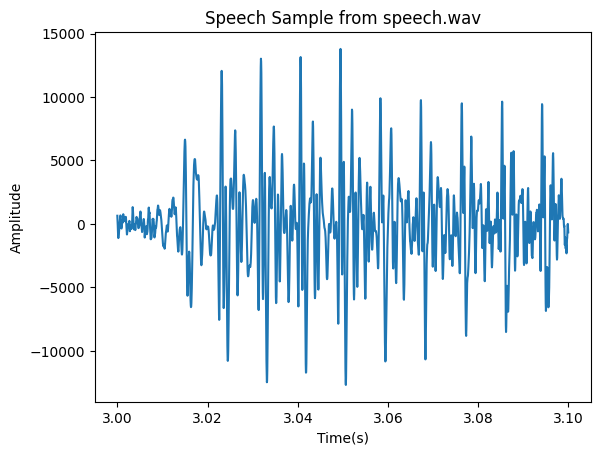

In [114]:
# read the audio file and plot 3.0 to 3.1 seconds
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

# read audio samples
input_data = read("speech.wav")
audio = input_data[1]
fr = input_data[0]

# isolate audio and x-limits
audio_interest = audio[3*fr : round(3.1*fr)]
T = np.arange(3, 3.1, 1/fr)[:-1]

# plot
plt.plot(T, audio_interest)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("Speech Sample from speech.wav")
plt.show()

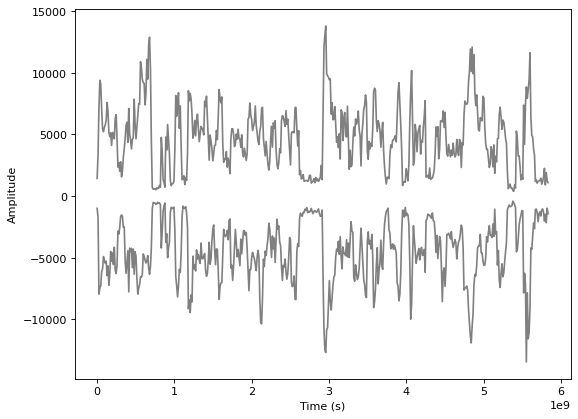

In [115]:
# Use the envelope function to plot the envelope (i.e. the upper and lower extents) of the entire audio waveform in "speech.wav" using nblocks=500.
# envelope values for speech
y_lower, y_upper, block_indices = envelope(audio, nblocks=500)

# isolate T
T = block_indices * (fr*2)

#plot
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(T, y_upper, c="gray")
plt.plot(T, y_lower, c="gray")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

### Self-check

You should test your code and make plots to verify that your implementations are correct.  The self-check quiz on canvas will allow you to check your draft submission before you submit your final version.  Here are examples of the types of questions you can expect

- Compute function values for specified parameters.

- What indices correspond to specified time values for a given sampling frequency?

- Plot the functions for specified parameters (applies to all functions).

- Make an overlay plot of a sine wave and a delayed sine wave.  To clearly illustrate the delay, you will be asked to format the plot and specify the x-axis ticks.

- Plot even and odd Gabor functions given parameters.

- Calculate the local maxima of a specific array of values.

- Plot a sine wave with markers at the maxima.

- Plot Gabor functions as a discrete set of samples in terms of samples per period.

- Make a grid plot of functions to illustrate the behavior over a range of parameters.

- Use the `envelope` function to plot the audio file `speech.wav` (in assignment files under the audio directory).

***
### Submission Instructions

Please refer to the Assignment Submission Instructions on canvas under the Pages tab.